# **IMPORTS/COMFIGIRAÇÕES**

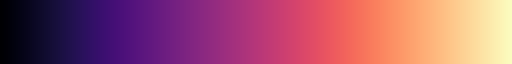

In [1]:
# Bibliotecas de manipulação
import numpy as np  # Manipulação de matrizes
import pandas as pd  # Manipulação de dados tabulares
# Bibliotecas de visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Bibliotecas próprias
from PROJECT_LIBRARY.Data_extraction import *  # Biblioteca própria para extração dos dados
from PROJECT_LIBRARY.Data_transformation import *  # Biblioteca própria para transformação dos dados
# Bibliotecas de processamento e pré-processamento
from sklearn.preprocessing import StandardScaler
# Biblioteca de filtro de notificações
import warnings
# Temas
from jupyterthemes import jtplot


warnings.filterwarnings(action='ignore')
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None
pd.options.display.float_format = lambda x: f'{x:,.2f}'
jtplot.style(theme='onedork')
sns.set_style()
sns.color_palette("pastel", as_cmap=True)
sns.set_palette('pastel')
sns.color_palette("magma", as_cmap=True)

In [2]:
upgrade_data(fold='./RAW_DATAS')

# **ANÁLISE DESCRITIVA**

In [2]:
df = pd.read_parquet('./DATASETS/finally_data.parquet')
df.head(5)

,COMPETÊNCIA,ESFERA,UF,AJUSTES,EC123,COUN,VAAF,VAAR,VAAT,FPE,FPM,ICMS,IPI,IPVA,ITCMD,ITR,LC8796,Ajuste,TOTAL
0,2007-01-01,ESTADUAL,AC,False,0.00,0.00,0.00,0.00,0.00,"9,679,990.36","1,582,026.94","3,147,424.17","3,548.46",0.00,0.00,0.00,0.00,0.00,"14,412,989.93"
2,2007-01-01,ESTADUAL,AL,False,0.00,0.00,0.00,0.00,0.00,"4,649,019.37","2,800,656.42","2,781,356.76","25,488.94",0.00,0.00,0.00,0.00,0.00,"10,256,521.49"
4,2007-01-01,ESTADUAL,AM,False,0.00,0.00,0.00,0.00,0.00,"5,436,974.54","2,819,795.95","19,285,518.14","401,249.83",0.00,0.00,0.00,0.00,0.00,"27,943,538.46"
6,2007-01-01,ESTADUAL,AP,False,0.00,0.00,0.00,0.00,0.00,"11,417,469.66","1,212,373.05","3,657,493.01","24,441.51",0.00,0.00,0.00,0.00,0.00,"16,311,777.23"
8,2007-01-01,ESTADUAL,BA,False,0.00,0.00,0.00,0.00,0.00,"8,860,187.40","8,866,635.04","17,745,924.57","569,490.71",0.00,0.00,0.00,0.00,0.00,"36,042,237.72"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11029 entries, 0 to 22138
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   COMPETÊNCIA  11029 non-null  datetime64[ns]
 1   ESFERA       11029 non-null  object        
 2   UF           11029 non-null  object        
 3   AJUSTES      11029 non-null  bool          
 4   EC123        11029 non-null  float64       
 5   COUN         11029 non-null  float64       
 6   VAAF         11029 non-null  float64       
 7   VAAR         11029 non-null  float64       
 8   VAAT         11029 non-null  float64       
 9   FPE          11029 non-null  float64       
 10  FPM          11029 non-null  float64       
 11  ICMS         11029 non-null  float64       
 12  IPI          11029 non-null  float64       
 13  IPVA         11029 non-null  float64       
 14  ITCMD        11029 non-null  float64       
 15  ITR          11029 non-null  float64       
 16  LC8796   

In [5]:
df.memory_usage()

Index          88232
COMPETÊNCIA    88232
ESFERA         88232
UF             88232
AJUSTES        11029
EC123          88232
COUN           88232
VAAF           88232
VAAR           88232
VAAT           88232
FPE            88232
FPM            88232
ICMS           88232
IPI            88232
IPVA           88232
ITCMD          88232
ITR            88232
LC8796         88232
Ajuste         88232
TOTAL          88232
dtype: int64

## VARIÁVEIS NUMÉRICAS

In [3]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_columns

['EC123',
 'COUN',
 'VAAF',
 'VAAR',
 'VAAT',
 'FPE',
 'FPM',
 'ICMS',
 'IPI',
 'IPVA',
 'ITCMD',
 'ITR',
 'LC8796',
 'Ajuste',
 'TOTAL']

### Tratamentos

In [7]:
df.describe()

,COMPETÊNCIA,EC123,COUN,VAAF,VAAR,VAAT,FPE,FPM,ICMS,IPI,IPVA,ITCMD,ITR,LC8796,Ajuste,TOTAL
count,23328,"23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00"
mean,2015-12-16 10:53:20,"31,016.32","6,001,053.60","3,266,391.37","81,406.09","1,327,423.78","12,146,402.49","12,712,030.13","60,493,523.12","689,356.84","5,620,068.28","965,207.82","159,377.03","196,086.33","8,558.91","103,697,902.16"
min,2007-01-01 00:00:00,0.00,"-213,329,018.65","-177,096,290.90",0.00,"-4,017,062.82","-13,294,613.27","-13,760,903.53","-33,113,879.07","-941,954.25","-11,514,016.68","-692,836.03","-10,531.09",0.00,0.00,"-213,329,016.65"
25%,2011-06-23 12:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2015-12-16 12:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2020-06-08 12:00:00,0.00,0.00,0.00,0.00,0.00,"17,842,769.34","14,268,187.63","49,019,153.71","242,308.96","2,263,079.41","200,159.91","13,204.30","33,913.98",0.00,"107,759,618.44"
max,2024-12-01 00:00:00,"121,893,595.92","777,405,463.20","891,910,015.10","41,131,672.03","590,990,738.15","250,779,967.56","283,833,187.85","2,431,147,109.50","19,202,111.15","1,177,690,607.31","89,383,539.05","31,457,569.15","29,611,036.12","54,682,223.94","3,676,716,953.17"
std,NaN,"1,246,477.76","29,681,929.72","27,838,746.60","852,352.81","13,967,617.85","20,783,454.07","25,786,745.32","169,252,987.60","1,778,401.11","30,591,818.93","3,856,000.92","1,116,402.39","777,197.01","507,036.42","236,910,468.87"


In [ ]:
# Tratamento de constantes 
cons = df.nunique()
cons.loc[cons.values==1].index.to_list()
# - (Não foram identificadas constantes entre os dados)

# Tratamento de duplicados
df.loc[df.duplicated()]
# - (Não foram identificadas registros duplicados entre os dados)

# Tratamento de valores ausentes
df.loc[df.isnull().any(axis=1)]
# - (Não foram identificadas registros ausentes entre os dados)

# Tratamento de valores inconsistentes ou sujos
# - Foram identificados valores negativos que representam ajustes e não se tratam de irregulares 
# df.loc[(df['TOTAL LIQUIDO'] < 0) & (df['CATEGORIA']!='Outros')]
# df.loc[(df['ESFERA']=='Estadual') & (df['UF']=='PB') & (df['COMPETÊNCIA']>='2023-01-01') & (df['COMPETÊNCIA']<='2023-12-31')]['TOTAL AJUSTE'].sum()
# - Não se sabe o motivo desses ajustes, entretanto, para os montantes corretos de 'total de ajuste' e 'total liquido', estes devem ser considerados negativos

Observa-se que os dados estão inicialmente tratados, conforme exposto na análise exploratória, e se encontram agrupados pela sua fonte de recurso, período, esfera e uf.

### Medidas de centralidade

In [17]:
df.describe(percentiles=[x/10 for x in range(0,11,1)])

,COMPETÊNCIA,EC123,COUN,VAAF,VAAR,VAAT,FPE,FPM,ICMS,IPI,IPVA,ITCMD,ITR,LC8796,Ajuste,TOTAL
count,11029,"11,029.00","11,029.00","11,029.00","11,029.00","11,029.00","11,029.00","11,029.00","11,029.00","11,029.00","11,029.00","11,029.00","11,029.00","11,029.00","11,029.00","11,029.00"
mean,2015-07-30 13:22:34.936984320,"65,604.21","12,721,157.43","7,007,206.91","172,186.17","2,809,043.93","25,697,185.76","26,892,977.10","127,970,578.69","1,458,302.39","11,890,327.88","2,041,785.45","337,110.85","414,752.19","18,103.38","219,496,322.41"
min,2007-01-01 00:00:00,0.00,"-177,097,598.83","-138,179,907.80",0.00,"-534,956.42","-188,038.21","-140,539.39","-270,130.08","-1,355.43","-34,346.38","-1,832.89",-25.21,0.00,0.00,2.98
0%,2007-01-01 00:00:00,0.00,"-177,097,598.83","-138,179,907.80",0.00,"-534,956.42","-188,038.21","-140,539.39","-270,130.08","-1,355.43","-34,346.38","-1,832.89",-25.21,0.00,0.00,2.98
10%,2008-09-01 00:00:00,0.00,0.00,0.00,0.00,0.00,"6,331,712.68","3,275,436.44","7,301,414.29","8,051.21","237,905.67","6,003.23","1,176.18",0.00,0.00,"29,886,656.18"
20%,2010-06-01 00:00:00,0.00,0.00,0.00,0.00,0.00,"9,405,592.61","6,052,299.39","15,378,710.45","29,066.66","587,386.14","27,398.47","2,675.56",0.00,0.00,"47,504,721.68"
30%,2012-03-01 00:00:00,0.00,0.00,0.00,0.00,0.00,"12,548,089.78","8,849,709.69","25,301,739.26","56,334.66","1,028,020.14","66,572.73","4,960.73",0.00,0.00,"64,613,753.44"
40%,2013-11-01 00:00:00,0.00,0.00,0.00,0.00,0.00,"15,497,079.73","11,779,679.11","37,865,113.49","136,836.99","1,672,319.22","131,826.56","8,922.74","8,403.21",0.00,"86,859,632.25"
50%,2015-08-01 00:00:00,0.00,0.00,0.00,0.00,0.00,"18,823,879.16","15,476,732.67","53,700,579.76","301,953.81","2,550,475.78","243,079.30","15,701.36","40,818.05",0.00,"117,187,897.04"
60%,2017-05-01 00:00:00,0.00,0.00,0.00,0.00,0.00,"22,889,792.99","20,711,942.51","76,969,514.03","679,594.67","3,905,115.89","456,688.49","31,141.30","114,932.65",0.00,"156,522,597.11"


Observa-se, quanto as medidas centrais, para cada variável, o descrito:
EC123/COUN/VAAF/VAAR/VAAT: Nos indicam uma grande oscilação ou um desvio padrão elevado, com mais de 2 vezes o valor da média, entre os valores repassados, além de até 70% dos registros não conterem valores, ocasionando uma mediana de 0.
FPE/FPM/ICMS/IPI: Nos indicam uma oscilação ou um desvio padrão considerável, com até 2 vezes o valor da média, entre os valores repassados e uma mediana com uma oscilação de até 50% para FPE e FPM e acima de 50% para ICMS e IPI.
IPVA/ITCMD/ITR/LC8796: Também nos indicam uma grande oscilação ou um desvio padrão elevado, com mais de 2 vezes o valor da média, entre os valores repassados
Ajuste: Nos indica uma grande oscilação ou um desvio padrão elevado, com mais de 2 vezes o valor da média, entre os valores repassados, além de até 90% dos registros não conterem valores, ocasionando uma mediana de 0.
TOTAL:

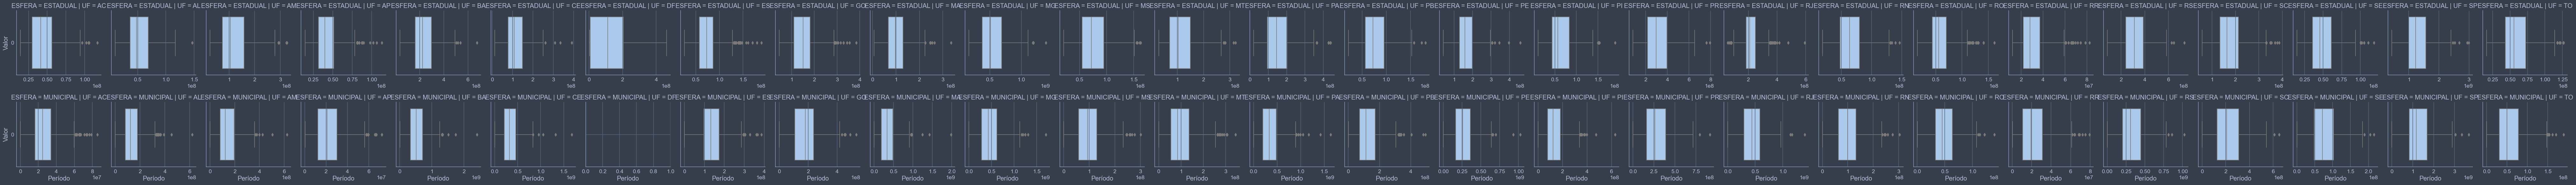

In [11]:
# Filtro
data = df.loc[df.TOTAL!=0]

# Gráfico
g = sns.FacetGrid(
    data=data,
    col='UF',
    row='ESFERA',
    height=3,
    sharex=False,
)
g.map_dataframe(
    sns.boxplot,
    x='TOTAL'
)

# Configuração gráficas
g.set_axis_labels("Período", "Valor")
for ax in g.axes.flat:
    ax.set_yticklabels([f'{y:,.0f}' for y in ax.get_yticks()])

# Plot
plt.tight_layout()
plt.show()

In [ ]:
# Filtro
data = df.loc[df.TOTAL!=0]

# Gráfico
g = sns.FacetGrid(
    data=data,
    col='UF',
    row='ESFERA',
    height=3,
    sharex=False,
)
g.map_dataframe(
    sns.displot,
    x='TOTAL'
)

# Configuração gráficas
g.set_axis_labels("Período", "Valor")
for ax in g.axes.flat:
    ax.set_yticklabels([f'{y:,.0f}' for y in ax.get_yticks()])

# Plot
plt.tight_layout()
plt.show()

### Distribuição

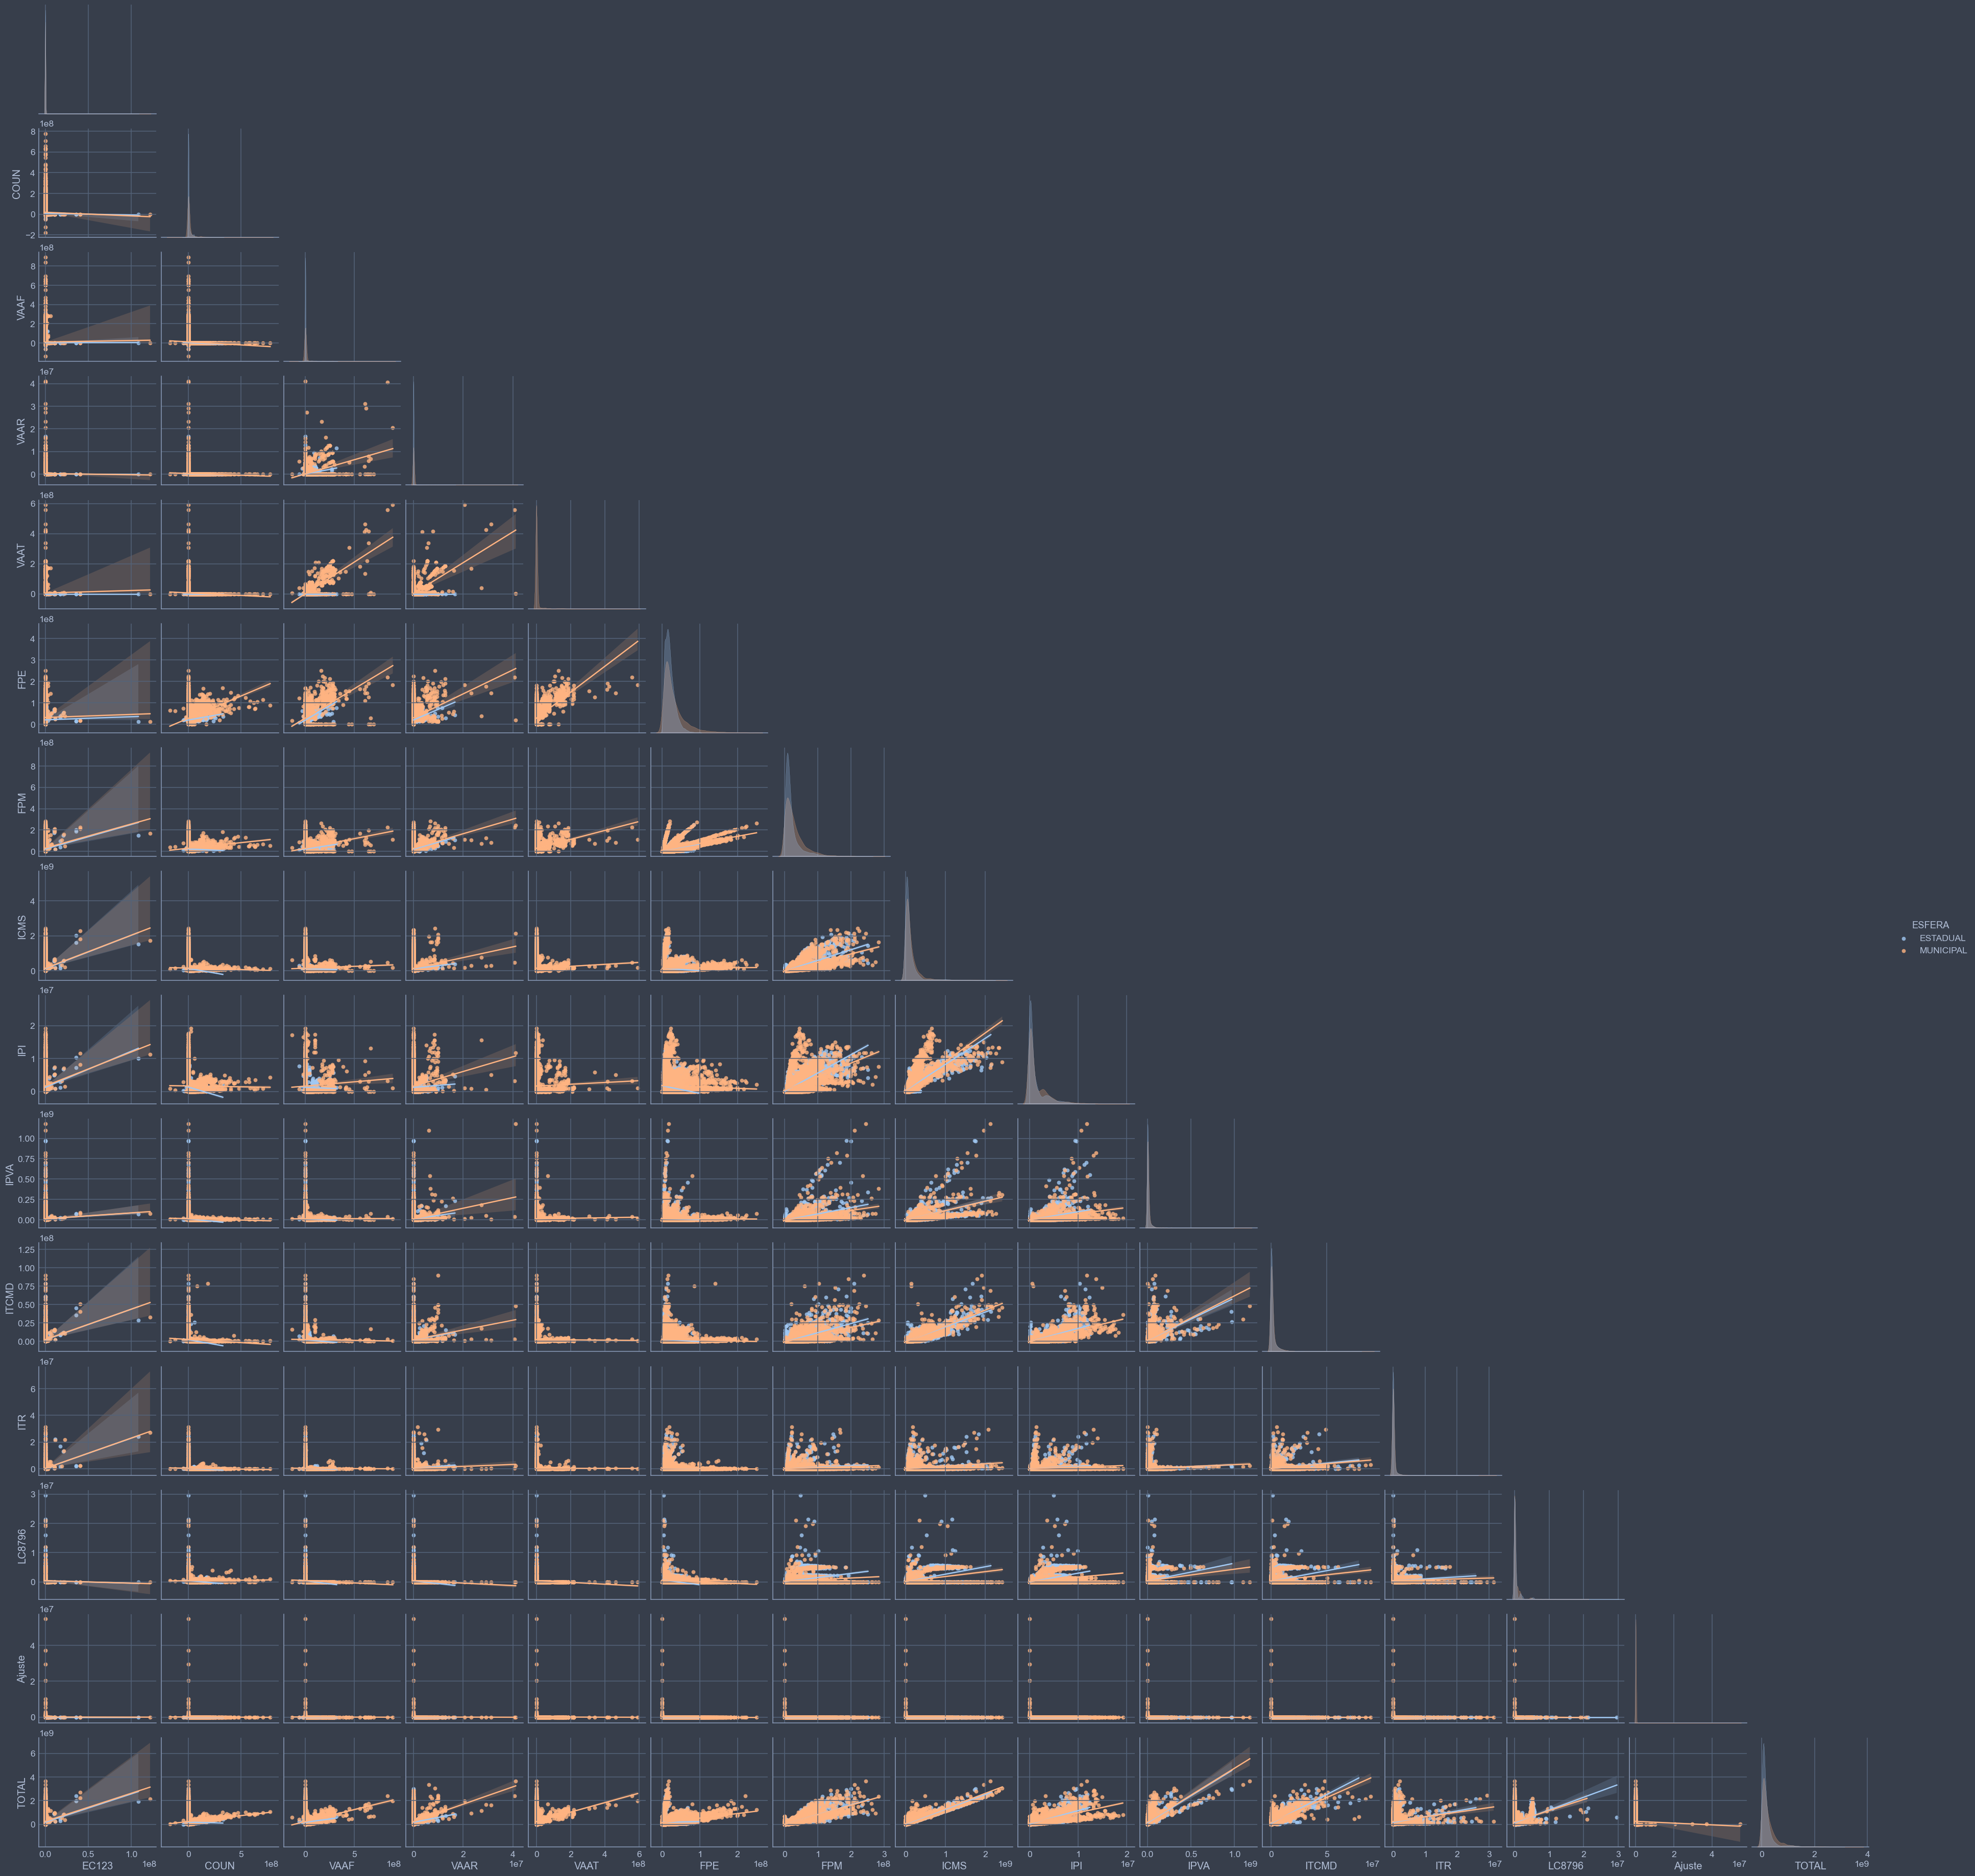

In [6]:
# Filtro
data = df.loc[df.TOTAL!=0]

# Gráfico
g = sns.pairplot(
    data=data,
    hue='ESFERA',
    vars=numeric_columns,
    corner=True,
    y_vars='TOTAL',
    kind='reg'
)

# Plot
plt.show()

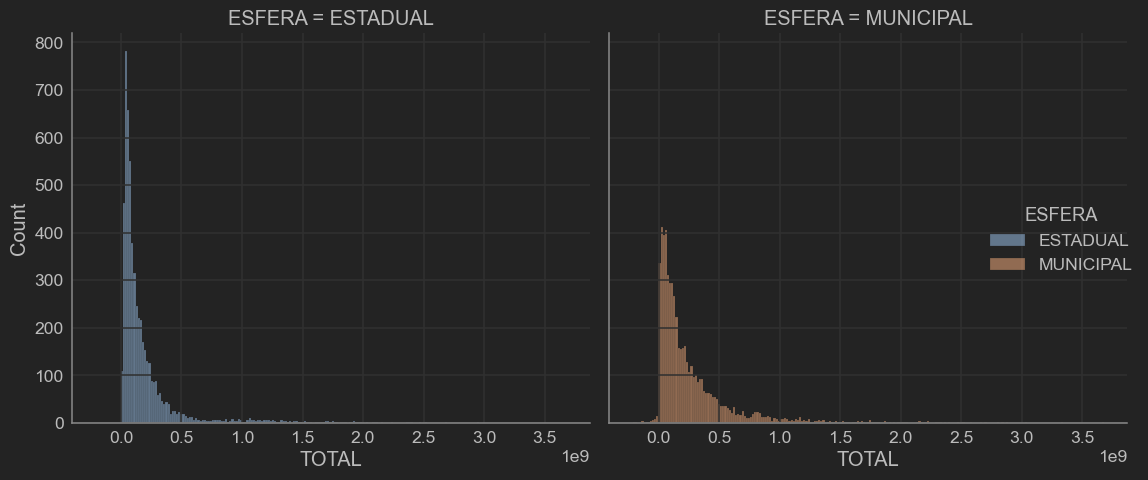

In [16]:
# Filtro
data = df.loc[df.TOTAL!=0]

# Gráfico
sns.displot(
    data=data,
    x='TOTAL',
    col='ESFERA',
    hue='ESFERA',
    facet_kws=dict(margin_titles=True)
    )


# Plot
plt.tight_layout()
plt.show()

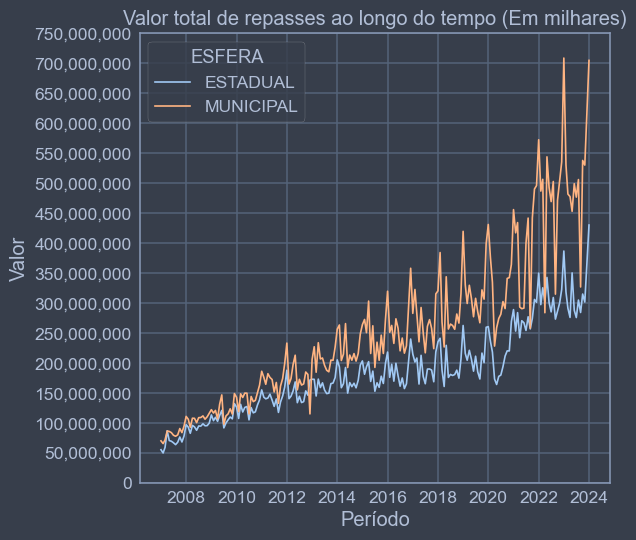

In [22]:
# Filtro
data = df[(df['COMPETÊNCIA']<='2024-01-01')]

# Gráfico
g = sns.lineplot(
    data=data,
    x='COMPETÊNCIA',
    y='TOTAL',
    hue='ESFERA',
    errorbar=None
)

# Configuração gráficas
plt.title('Valor total de repasses ao longo do tempo (Em milhares)')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.yticks([x for x in range(0, 750000001, 50000000)])
# plt.xticks([x for x in range(2007, 2025, 1)])
plt.ylim(0, 750000000)
plt.gca().set_yticklabels([f'{y:,.0f}' for y in plt.gca().get_yticks()])

#Plot
plt.tight_layout()
plt.show()

In [29]:
# Filtro
data = df[(df['COMPETÊNCIA']<='2024-01-01')]

# Gráfico
g = sns.pairplot(
    data=data,
    kind='hist'
    )

# Configurações gráficas
g.set_titles('Esfera {col_name}')

#Plot
plt.tight_layout()
plt.show()

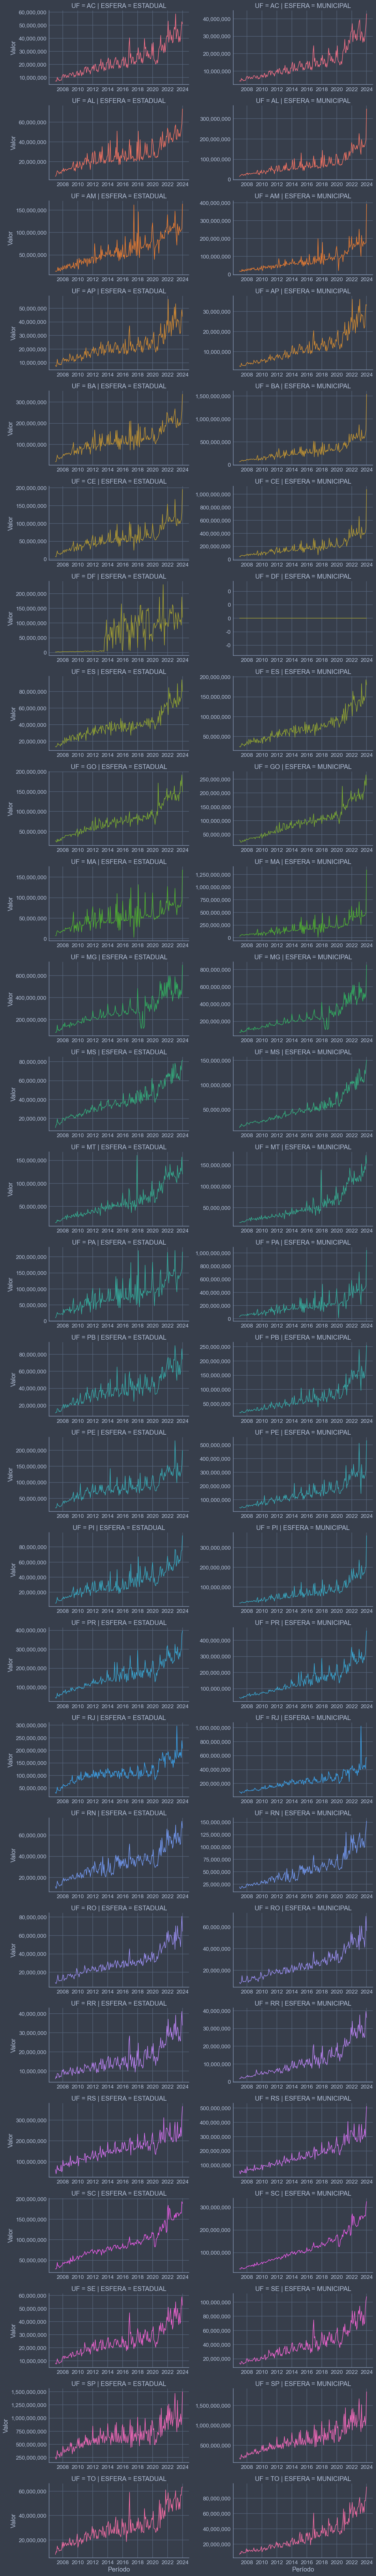

In [50]:
# Dados filtrados
data = df[(df['COMPETÊNCIA']<='2024-01-01')]

# Gráficos
g = sns.FacetGrid(
    data, 
    col='ESFERA', 
    row='UF',
    hue='UF', 
    sharey=False,
    sharex=False,
    height=3,
    aspect=2
    )
g.map_dataframe(sns.lineplot, 
                  x='COMPETÊNCIA', 
                  y='TOTAL',
                  errorbar=None
                  )

# Configuração gráficas
g.set_axis_labels("Período", "Valor")
for ax in g.axes.flat:
    ax.set_yticklabels([f'{y:,.0f}' for y in ax.get_yticks()])


# Plot
plt.tight_layout()
plt.show()

Visualmente podemos notar 

## VARIÁVEIS CATEGÓRICAS

In [ ]:
cat_vars = df.select_dtypes(include=['category']).columns.to_list()
cat_vars

In [ ]:
df.describe(include='category')

In [ ]:
for cat in cat_vars:
    print(cat, sorted(df[cat].unique().to_list()))

x - Distribuição dos valores mensais (boxplot)

In [ ]:
df_temp = df_e.copy()
df_temp = df_temp.resample('m').sum()

g = px.box(data_frame=df_temp, x=['TOTAL LIQUIDO'], points='all', hover_name=df_temp.index)
g.update_traces(hovertemplate=None)
g.update_layout(hovermode='y', xaxis_tickformat=',.2f')
g.show()

x - Valor total dos repasses por ano

In [ ]:
df_temp = df_e.copy()
df_temp = df_temp.resample(rule='y').sum(numeric_only=True)

g = px.line(data_frame=df_temp,  y='TOTAL LIQUIDO', x=df_temp.index.year, title='Total de repasses efetuados aos estados por ano de 2007 a 09-2023', markers='.')
g.update_traces(hovertemplate=None)
g.update_layout(hovermode='x unified', yaxis_tickformat=',.2s')
g.show()

x - Valor total dos repasses por mês (tendência, velocidade e aceleração)

In [ ]:
df_temp = df_e.copy()
filtro = df_temp.UF == 'AP'
df_temp = df_temp[filtro].resample(rule='M').sum(numeric_only=True)
df_temp['MEDIA MOVEL'] = df_temp['TOTAL LIQUIDO'].rolling(window=12).mean()

g = px.line(data_frame=df_temp,  y=['TOTAL LIQUIDO', 'MEDIA MOVEL'], x=df_temp.index, title='Total de repasses efetuados aos estados por mês de 01-2007 a 09-2023')
g.update_traces(hovertemplate=None)
g.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
g.show()

x - Estacionariedade e ruido

In [ ]:
df_temp = df_e.copy()
df_temp = df_temp.resample(rule='m').sum(numeric_only=True)
df_temp['DIFERENCIAÇÃO'] = df_temp['TOTAL LIQUIDO'].diff(1)

g = px.bar(data_frame=df_temp, x=df_temp.index, y=['DIFERENCIAÇÃO'])
g.update_traces(hovertemplate=None)
g.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
g.show()

x - Sazonalidade

In [ ]:
df_temp = df_e.copy()
df_temp = df_temp.resample(rule='m').sum(numeric_only=True)
df_temp['MEDIA MOVEL'] = df_temp['TOTAL LIQUIDO'].rolling(window=7).mean()
df_temp['SAZONALIDADE'] = df_temp['TOTAL LIQUIDO'].diff(1)
df_temp = df_temp['SAZONALIDADE'].groupby(df_temp.index.month).mean()

g = px.bar(data_frame=df_temp, x=df_temp.index, y=['SAZONALIDADE'])
g.update_traces(hovertemplate=None)
g.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
g.show()

x - Média anual dos repasses por estados

In [ ]:
df_temp = df_e.copy()
df_temp = df_temp.groupby('UF').resample(rule='Y').sum(numeric_only=True).reset_index(level=0)
df_temp = df_temp.groupby('UF').mean().sort_values(by='TOTAL LIQUIDO')

g = px.bar(data_frame=df_temp,  x='TOTAL LIQUIDO', y=df_temp.index, title='Média do total de repasses recebidos por ano para cada estado de 2007 a 10-2023')
g.update_traces(hovertemplate=None)
g.update_layout(hovermode='y unified', xaxis_tickformat=',.2f')
g.show()

x - Média anual dos repasses por fonte

In [ ]:
df_temp = df_e.copy()
df_temp = df_temp.groupby('REPASSE').resample(rule='Y').sum(numeric_only=True).reset_index(level=0)
df_temp = df_temp.groupby('REPASSE').mean().sort_values(by='TOTAL LIQUIDO')


g = px.pie(data_frame=df_temp,  names=df_temp.index, values='TOTAL LIQUIDO', opacity=0.8, hole=0.5, title='Média do total de repasses recebidos por ano para cada fonte de 2007 a 09-2023')
g.update_traces(hovertemplate=None)
g.update_layout(hovermode='y unified', xaxis_tickformat=',.2f')
g.show()

## QUADRO DO PERÍODO ATUAL


x - Total de repasses por mês de 2023

In [ ]:
df_temp = df_e.copy()
filter = (df_temp.index.year >= 2023) & (df_temp.index.month <= 10)
df_temp = df_temp[filter].resample(rule='MS').sum(numeric_only=True)
display(df_temp.head())

g = px.line(data_frame=df_temp, x=df_temp.index, y='TOTAL LIQUIDO')
g.update_traces(hovertemplate=None)
g.update_layout(hovermode='y unified', yaxis_tickformat=',.2f')
g.show()

In [ ]:
df_temp = df_e.copy()
filter = (df_temp.UF == 'AP') & (df_temp.index.year >= 2023) & (df_temp.index.month <= 10)
df_temp = df_temp[filter].resample(rule='MS').sum(numeric_only=True)
df_temp['SOMA CUMULATIVA'] = df_temp['TOTAL LIQUIDO'].cumsum()
df_temp.head()

g = px.bar(data_frame=df_temp,  y=['SOMA CUMULATIVA'], x=df_temp.index, title='Total de repasses efetuados aos estados por mês de 01-2007 a 10-2023')
g.update_traces(hovertemplate=None)
g.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
g.show()

x - Ranking dos estados com maior valor total de repasses no período

In [ ]:
df_temp = df.copy().set_index(keys='COMPETÊNCIA')
df_temp = df_temp.loc[(df_temp.index.year >= 2023) & (df_temp.index.month <= 10)]
df_temp = df_temp[df_temp.ESFERA =='Estadual']
df_temp = df_temp.groupby('UF').resample(rule='Y').sum(numeric_only=True).reset_index(level=0).sort_values(by='TOTAL LIQUIDO')
display(df_temp.head())

g = px.bar(data_frame=df_temp, y='UF', x='TOTAL LIQUIDO')
g.update_traces(hovertemplate=None)
g.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
g.show()

x - Ranking do valor total de repasses por fonte

In [ ]:
df_temp = df_e.copy()
filter = (df_temp.index.year == 2023) & (df_temp.index.month <= 10)
df_temp = df_temp[filter].groupby('REPASSE').sum(numeric_only=True).loc[['COUN_VAAF', 'COUN_VAAR', 'COUN_VAAT', 'FPE', 'FPM', 'ICMS', 'IPI', 'IPVA', 'ITCMD', 'ITR'], :].sort_values(by='TOTAL LIQUIDO', ascending=False)

g = px.bar(data_frame=df_temp, x=df_temp.index.get_level_values(0), y='TOTAL LIQUIDO')
g.update_traces(hovertemplate=None)
g.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
g.show()